# Model Optimization and Evaluation

This notebook contains the evaluation of each model iteration. The first step is to improve on the baseline model, and then to continue improving with each iteration. In general, the criteria for deciding whether a model constitutes an improvement over the previous iteration will be the validation accuracy and the validation loss. Additionally, the following observations will be considered: 

- **Training/Validation Accuracy Difference:** The distance between the training and validation accuracy scores for each epoch. A large positive distance suggests overfitting, while a small positive or a negative distance suggests underfitting. This will be optimized by increasing the model capacity to slow down the training time, and effectively allowing for the validation accuracy to track the training at an optimal distance.


- **Validation Accuracy Plateau Time:** The time (number of epochs) at which the validation accuracy stops increasing. If the validation accuracy is still increasing (and if the validation loss is still decreasing) at the end of the training run, then there may be scope for additional capacity. Conversely, if the validation accuracy quickly reaches a plateau, then the model is likely to be overfitting.

The overarching goal during the evaluation phase is to achieve a validation accuracy greater than 80%. Therefore the ideal range for the training/validation accuracy difference is around 20% (assuming the training accuracy peaks tends to 100%). Fruthermore, the validation accuracy plateau time will be kept as close to the end of the training run as possible.

In [1]:
# importing necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from keras import models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import pickle
import os
from send2trash import send2trash
%matplotlib inline

In [2]:
# importing relevant evaluation functions
from functions.plot_opt_review import plot_opt_review
from functions.save_best import save_best
from functions.plot_evaluation import plot_evaluation
from functions.swish import *
add_swish()

## Baseline Model

In [3]:
# loading model histories
with open('../notebooks/model_construction/saved_models/model_01_history', 'rb') as file:
    model_01_history=pickle.load(file)

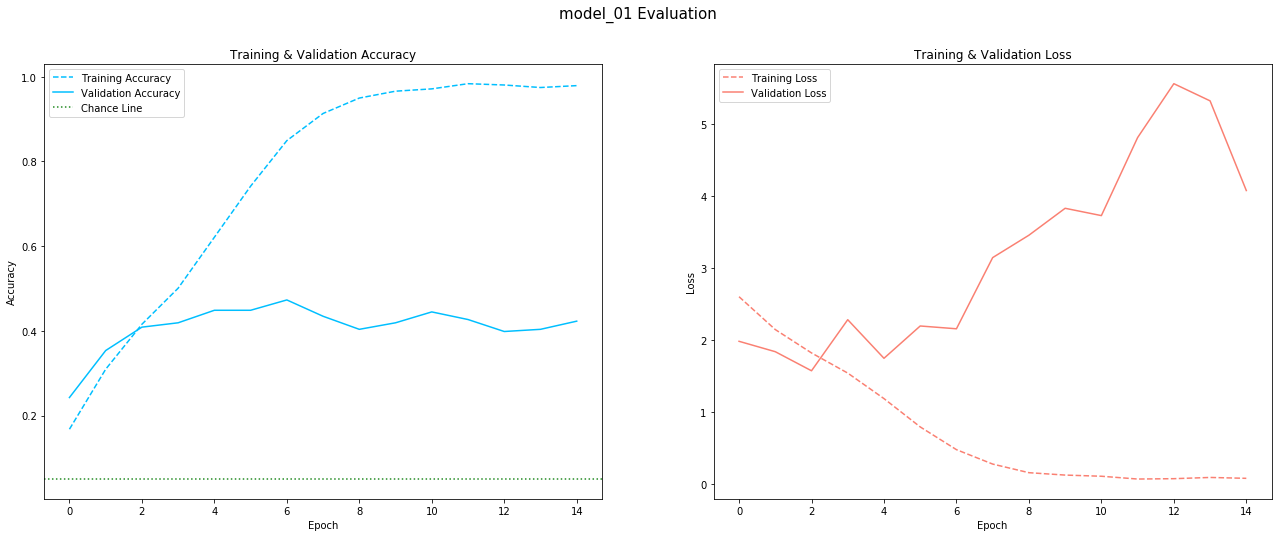

In [4]:
# visualizing evaluation
plot_evaluation('model_01')

### Review Notes:

The model does not perform particularly well, overfitting after roughly 4 epochs. Validation accuracy plateaus at approximately 42%, and the loss does not decrease much before starting to increase. This sets a baseline against which subsequent iterations will be measured.

## Optimization Trial for Model 2: Data Augmentation

In [5]:
# loading model histories
with open('../notebooks/model_construction/saved_models/model_02_history', 'rb') as file:
    model_02_history=pickle.load(file)

In [6]:
# organizing model details in preparation for evaluation
m2_list = [model_02_history]
m2_names = ['model_02']
mh2 = list(zip(m2_names,m2_list))

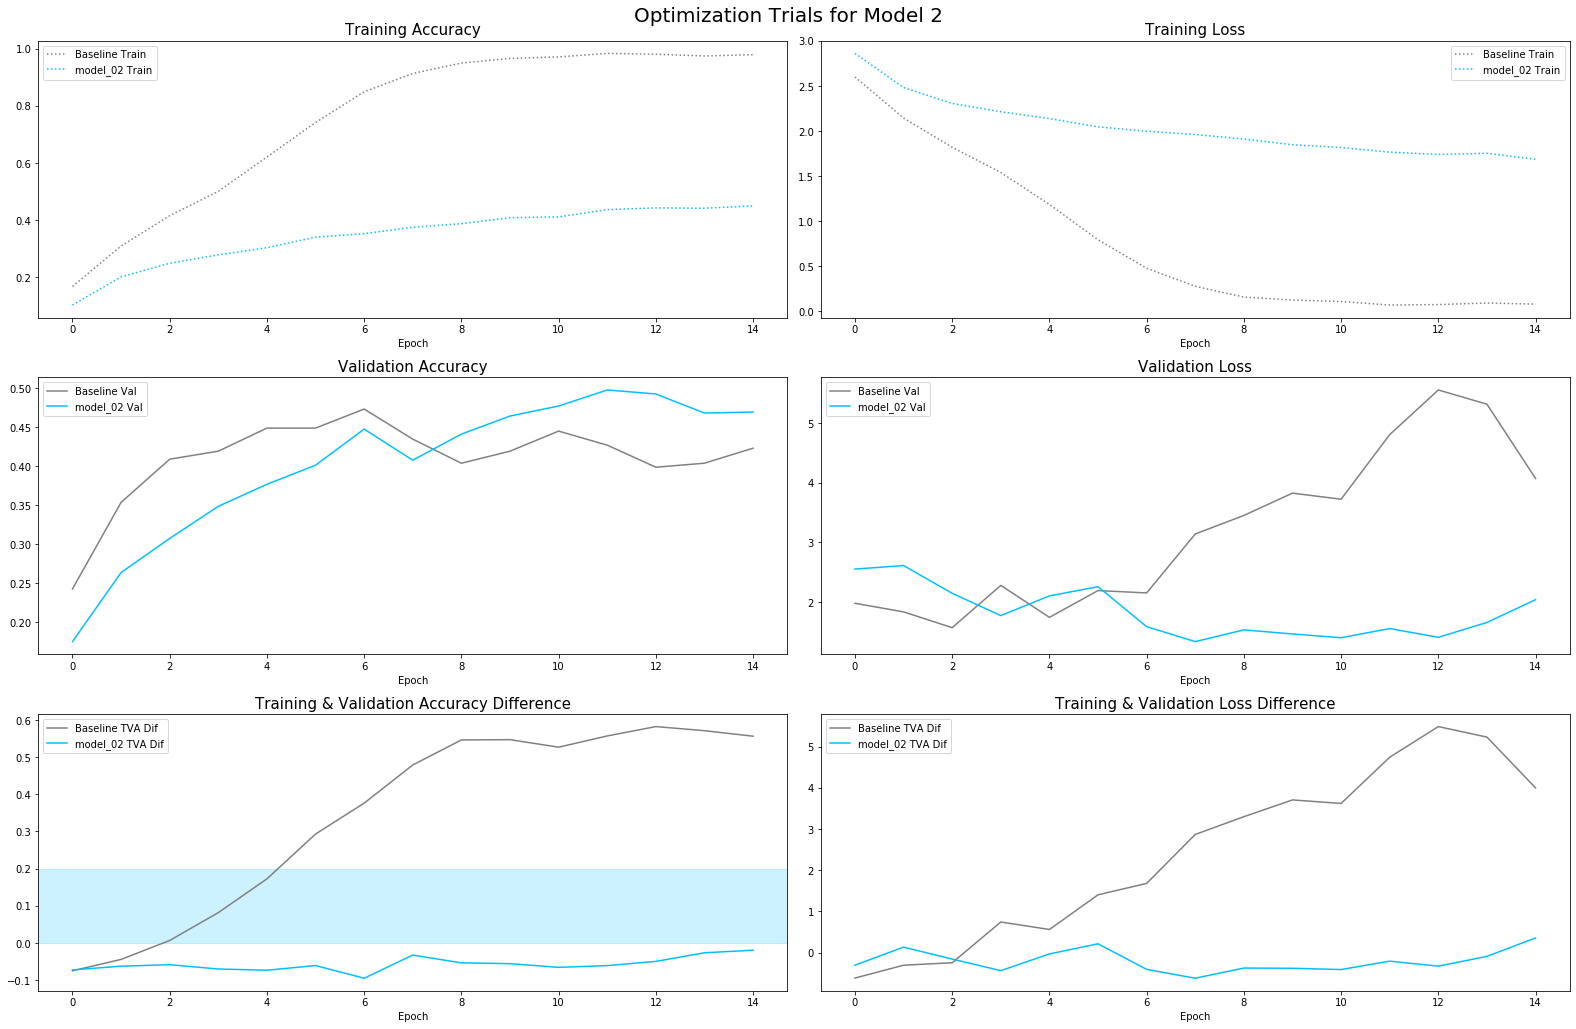

In [7]:
# visualizing evaluation
plot_opt_review(mh2,
                baseline='model_01',
                trial_no=2,
                roll=None,
                val_acc_ylim=None,
                val_loss_ylim=None)

### Review Notes:

The data augmentation has a number of significant effects on the model's performance. Firstly, the training time is greatly increased, such that the training accuracy only reaches approximately 40% within the training period. Secondly, the validation accuracy stays above the training accuracy for the entire period, meaning that the model is severly underfitting. The validation accuracy is already better than the baseline model, and because the training is not complete there is a good amount of headroom for validation accuracy.

## Optimization Trial for Model 3: Optimizer

In [8]:
# loading model histories
with open('../notebooks/model_construction/saved_models/m3_t1_history', 'rb') as file:
    m3_t1_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m3_t2_history', 'rb') as file:
    m3_t2_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m3_t3_history', 'rb') as file:
    m3_t3_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m3_t4_history', 'rb') as file:
    m3_t4_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m3_t5_history', 'rb') as file:
    m3_t5_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m3_t6_history', 'rb') as file:
    m3_t6_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m3_t7_history', 'rb') as file:
    m3_t7_history=pickle.load(file)

In [9]:
# organizing model details in preparation for evaluation
m3_list = [m3_t1_history, m3_t2_history, m3_t3_history, m3_t4_history, m3_t5_history, m3_t6_history, m3_t7_history]
m3_names = ['m3_t1', 'm3_t2', 'm3_t3', 'm3_t4', 'm3_t5', 'm3_t6', 'm3_t7']
mh3 = list(zip(m3_names,m3_list))

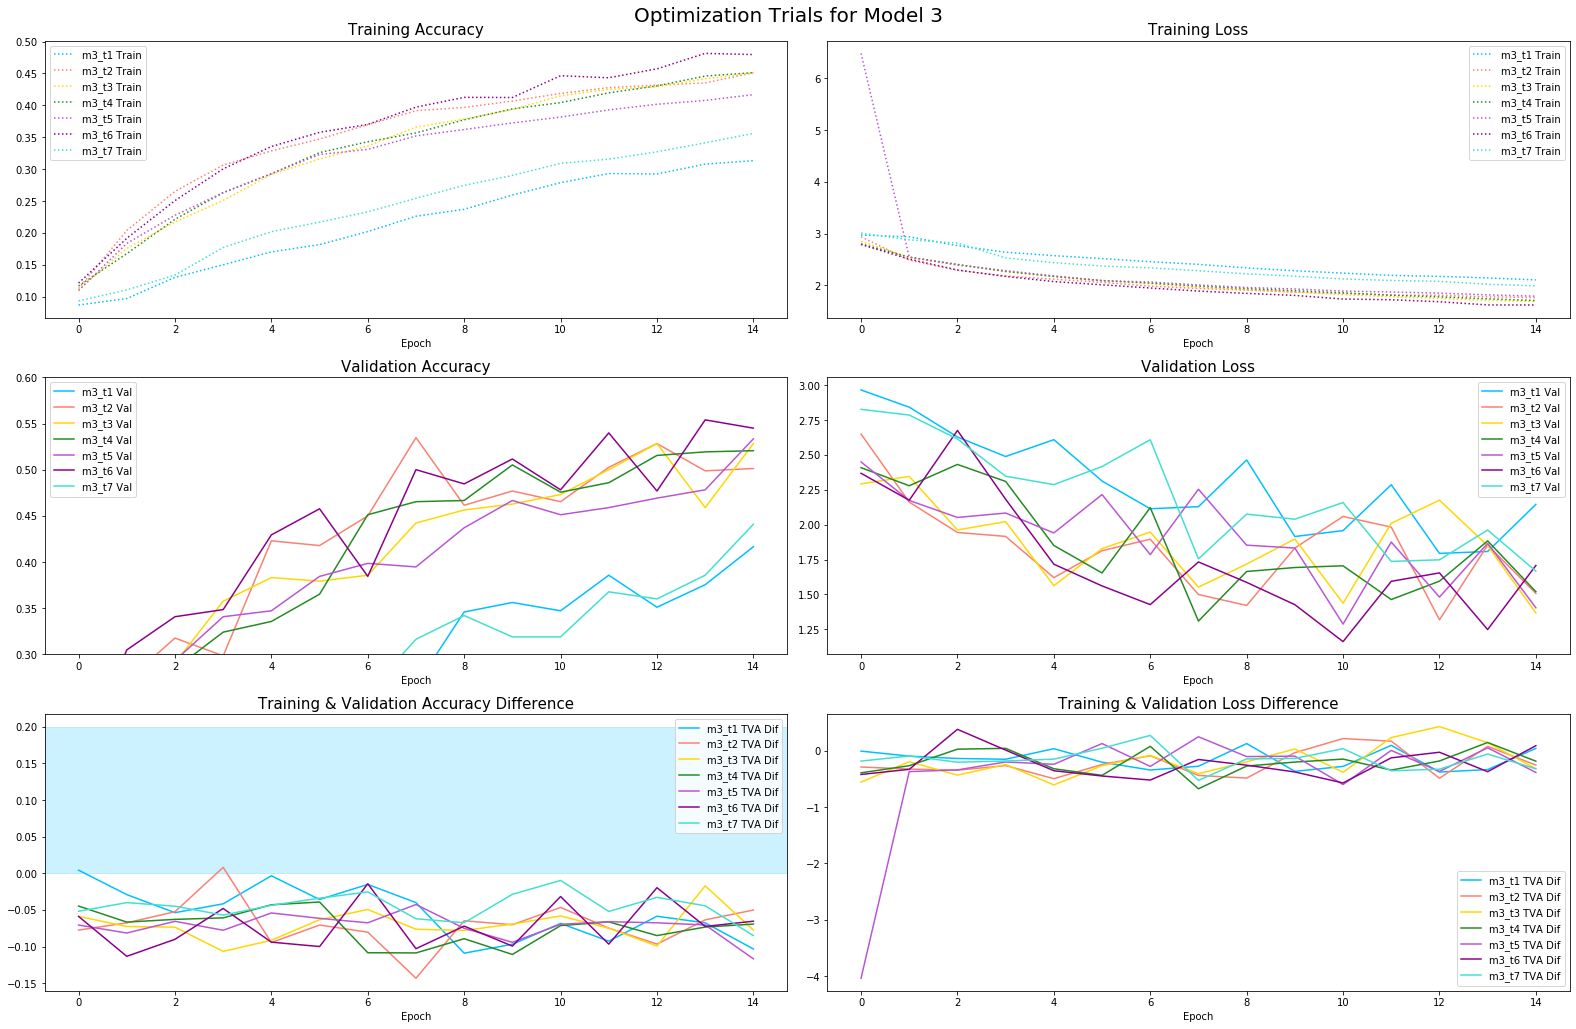

In [10]:
# visualizing evaluation
plot_opt_review(mh3,
                trial_no=3,
                roll=None,
                val_acc_ylim=(0.3,0.6),
                val_loss_ylim=None)

### Review Notes:

All of the trials continue to underfit because of the data augmentation. In terms of validation accuracy and loss, the best performing model is m3_t6, the one using the Adamax optimizer. Apart from Nadam and SGD, there is not much difference in performance between the other trials.

In [11]:
# saving best model in folder and removing others
save_best(m3_names,m3_t6_history,best_name='m3_t6',save_as='model_03')

Cannot save m3_t6 because the file does not exist - maybe already saved as model_03
Cannot remove m3_t1 because the file does not exist - maybe already removed
Cannot remove m3_t2 because the file does not exist - maybe already removed
Cannot remove m3_t3 because the file does not exist - maybe already removed
Cannot remove m3_t4 because the file does not exist - maybe already removed
Cannot remove m3_t5 because the file does not exist - maybe already removed
Cannot remove m3_t6 because the file does not exist - maybe already removed
Cannot remove m3_t7 because the file does not exist - maybe already removed


## Optimization Trial for Model 4: Batch Size

In [12]:
# loading model histories
with open('../notebooks/model_construction/saved_models/m4_t1_history', 'rb') as file:
    m4_t1_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m4_t2_history', 'rb') as file:
    m4_t2_history=pickle.load(file)

In [13]:
# organizing model details in preparation for evaluation
m4_list = [m4_t1_history, m4_t2_history]
m4_names = ['m4_t1', 'm4_t2']
mh4 = list(zip(m4_names,m4_list))

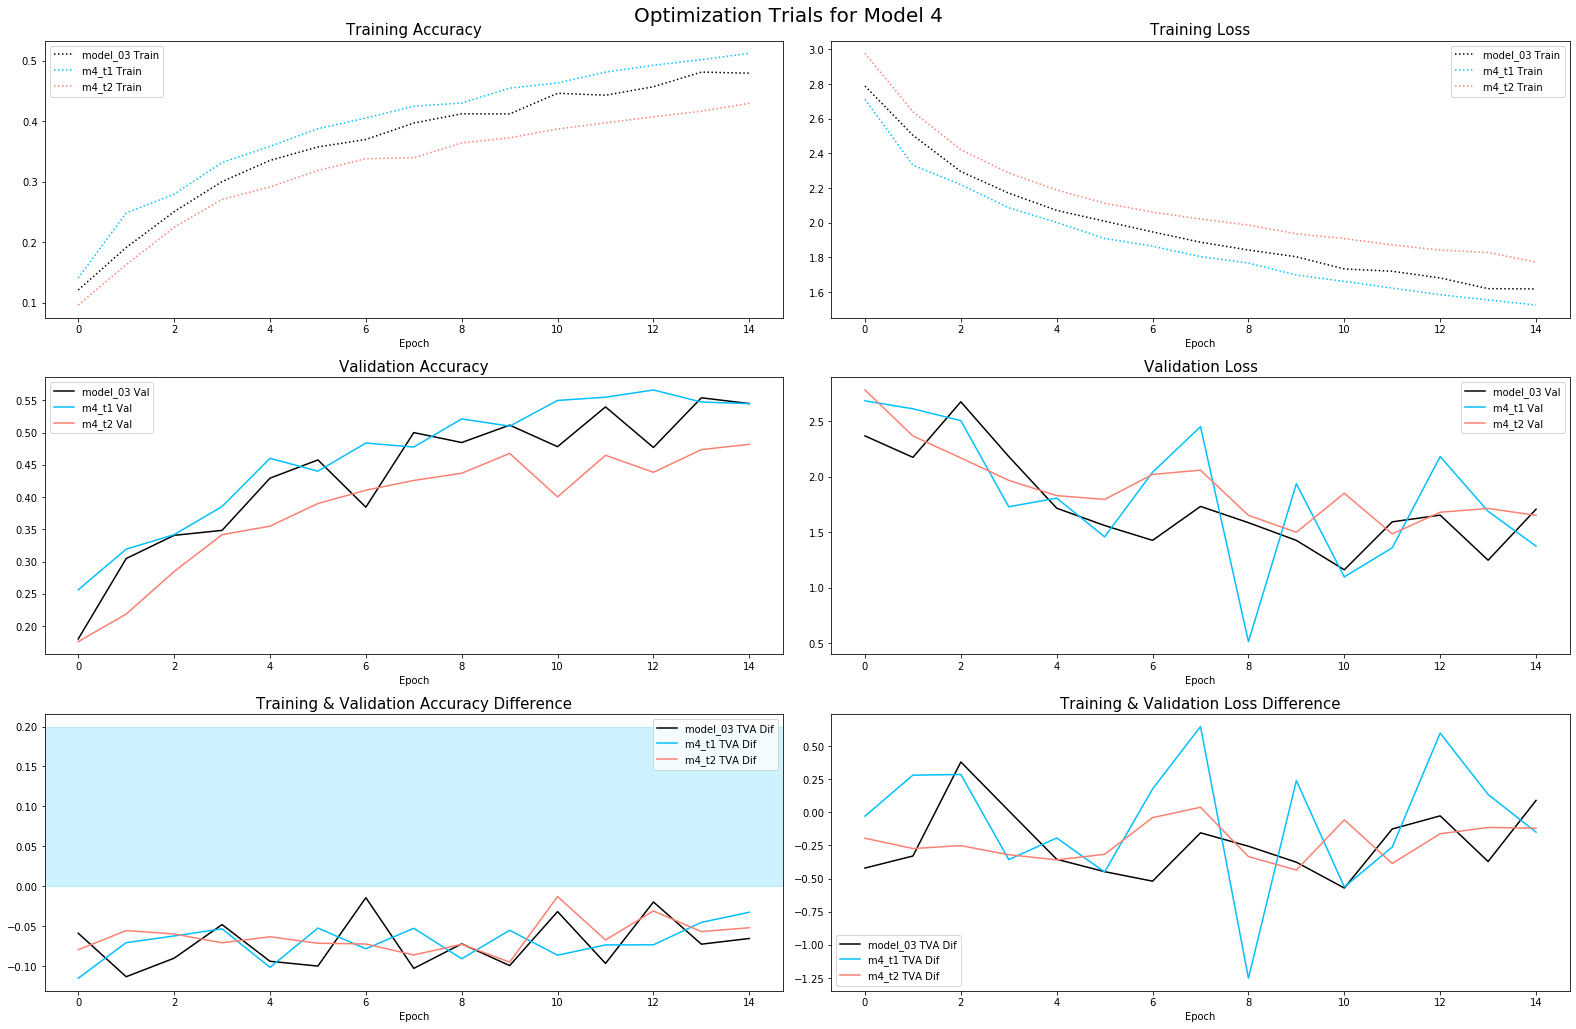

In [14]:
# visualizing evaluation
plot_opt_review(mh4,
                prev_best='model_03',
                trial_no=4,
                roll=None,
                val_acc_ylim=None,
                val_loss_ylim=None)

### Review Notes:

Changing the batch size has a noticeable impact on the model, both in terms of training time and performance. Training increases with smaller batches, but performance also improves. The batch size of 8 (m4_t1) outperforms the larger batch sizes (model_03, batch size 32; and m4_t2, batch size 128).

In [15]:
# saving best model in folder and removing others
save_best(m4_names,m4_t1_history,best_name='m4_t1',save_as='model_04')

Cannot save m4_t1 because the file does not exist - maybe already saved as model_04
Cannot remove m4_t1 because the file does not exist - maybe already removed
Cannot remove m4_t2 because the file does not exist - maybe already removed


## Optimization Trial for Model 5: Activation Function

In [16]:
# loading model histories
with open('../notebooks/model_construction/saved_models/m5_t1_history', 'rb') as file:
    m5_t1_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m5_t2_history', 'rb') as file:
    m5_t2_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m5_t3_history', 'rb') as file:
    m5_t3_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m5_t4_history', 'rb') as file:
    m5_t4_history=pickle.load(file)

In [17]:
# organizing model details in preparation for evaluation
m5_list = [m5_t1_history, m5_t2_history, m5_t3_history, m5_t4_history]
m5_names = ['m5_t1', 'm5_t2', 'm5_t3', 'm5_t4']
mh5 = list(zip(m5_names,m5_list))

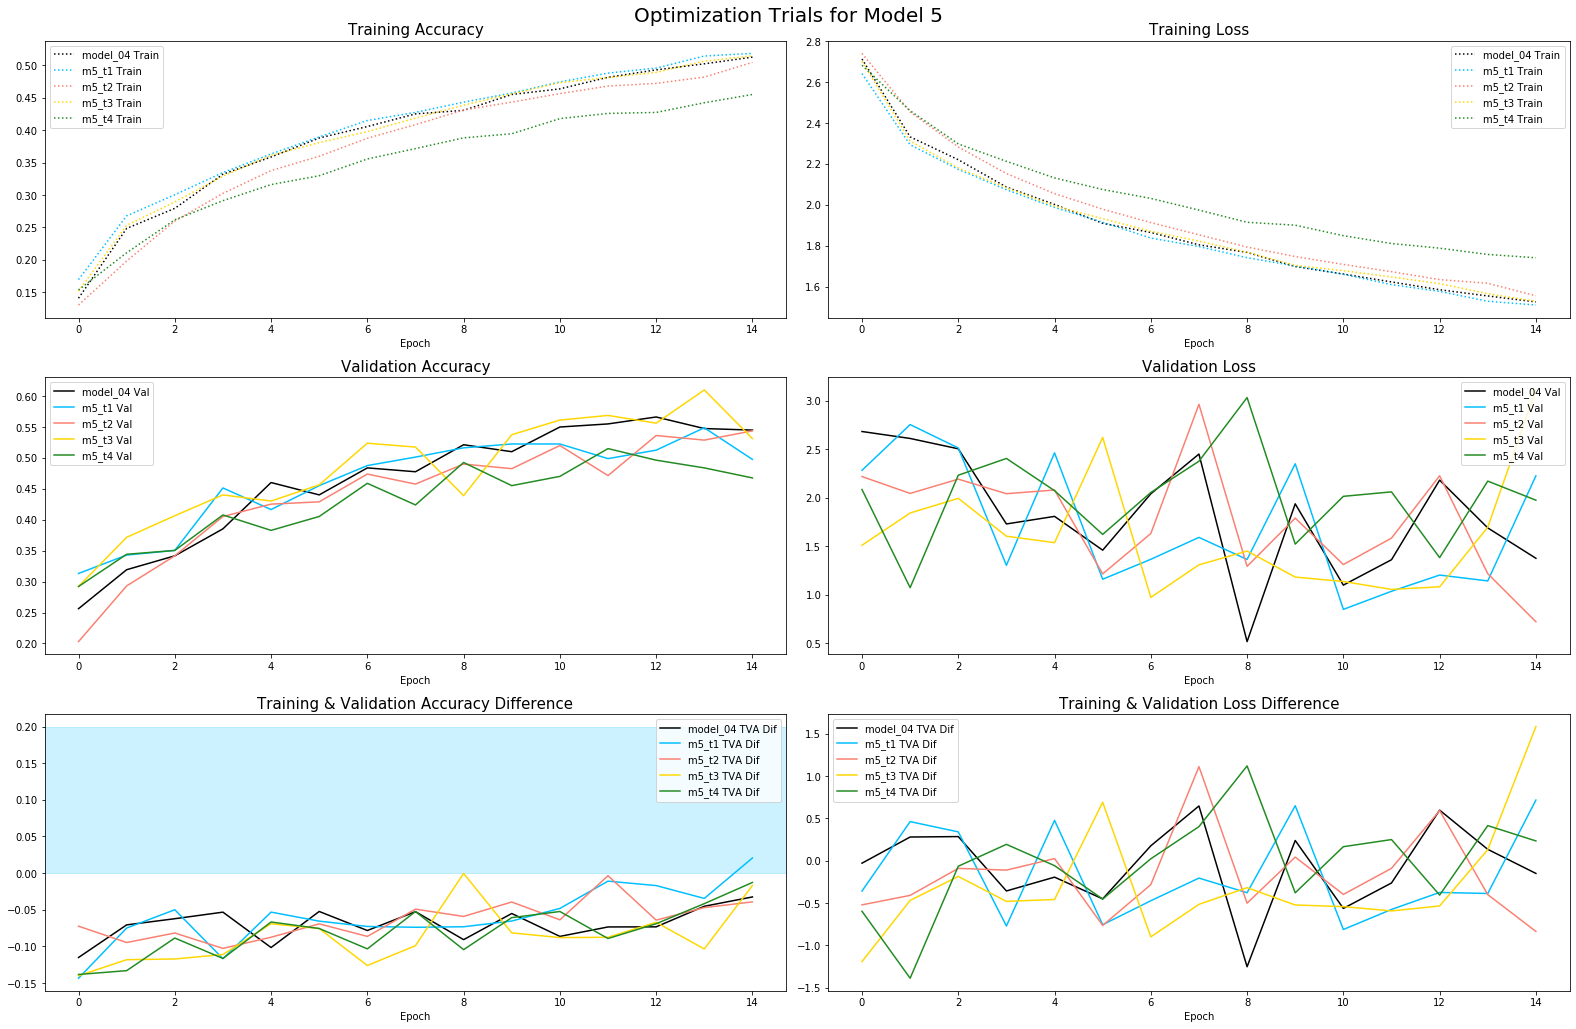

In [18]:
# visualizing evaluation
plot_opt_review(mh5,
                prev_best='model_04',
                trial_no=5,
                roll=None,
                val_acc_ylim=None,
                val_loss_ylim=None)

### Review Notes:

Of all the ReLU-variant activation functions, Leaky ReLU (m5_t3) seems to perform the best in the model. 

In [19]:
# saving best model in folder and removing others
save_best(m5_names,m5_t3_history,best_name='m5_t3',save_as='model_05')

Cannot save m5_t3 because the file does not exist - maybe already saved as model_05
Cannot remove m5_t1 because the file does not exist - maybe already removed
Cannot remove m5_t2 because the file does not exist - maybe already removed
Cannot remove m5_t3 because the file does not exist - maybe already removed
Cannot remove m5_t4 because the file does not exist - maybe already removed


## Optimization Trial for Model 6: Kernel Initialization

In [20]:
# loading model histories
with open('../notebooks/model_construction/saved_models/m6_t1_history', 'rb') as file:
    m6_t1_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m6_t2_history', 'rb') as file:
    m6_t2_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m6_t3_history', 'rb') as file:
    m6_t3_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m6_t4_history', 'rb') as file:
    m6_t4_history=pickle.load(file)

In [21]:
# organizing model details in preparation for evaluation
m6_list = [m6_t1_history, m6_t2_history, m6_t3_history, m6_t4_history]
m6_names = ['m6_t1', 'm6_t2', 'm6_t3', 'm6_t4']
mh6 = list(zip(m6_names,m6_list))

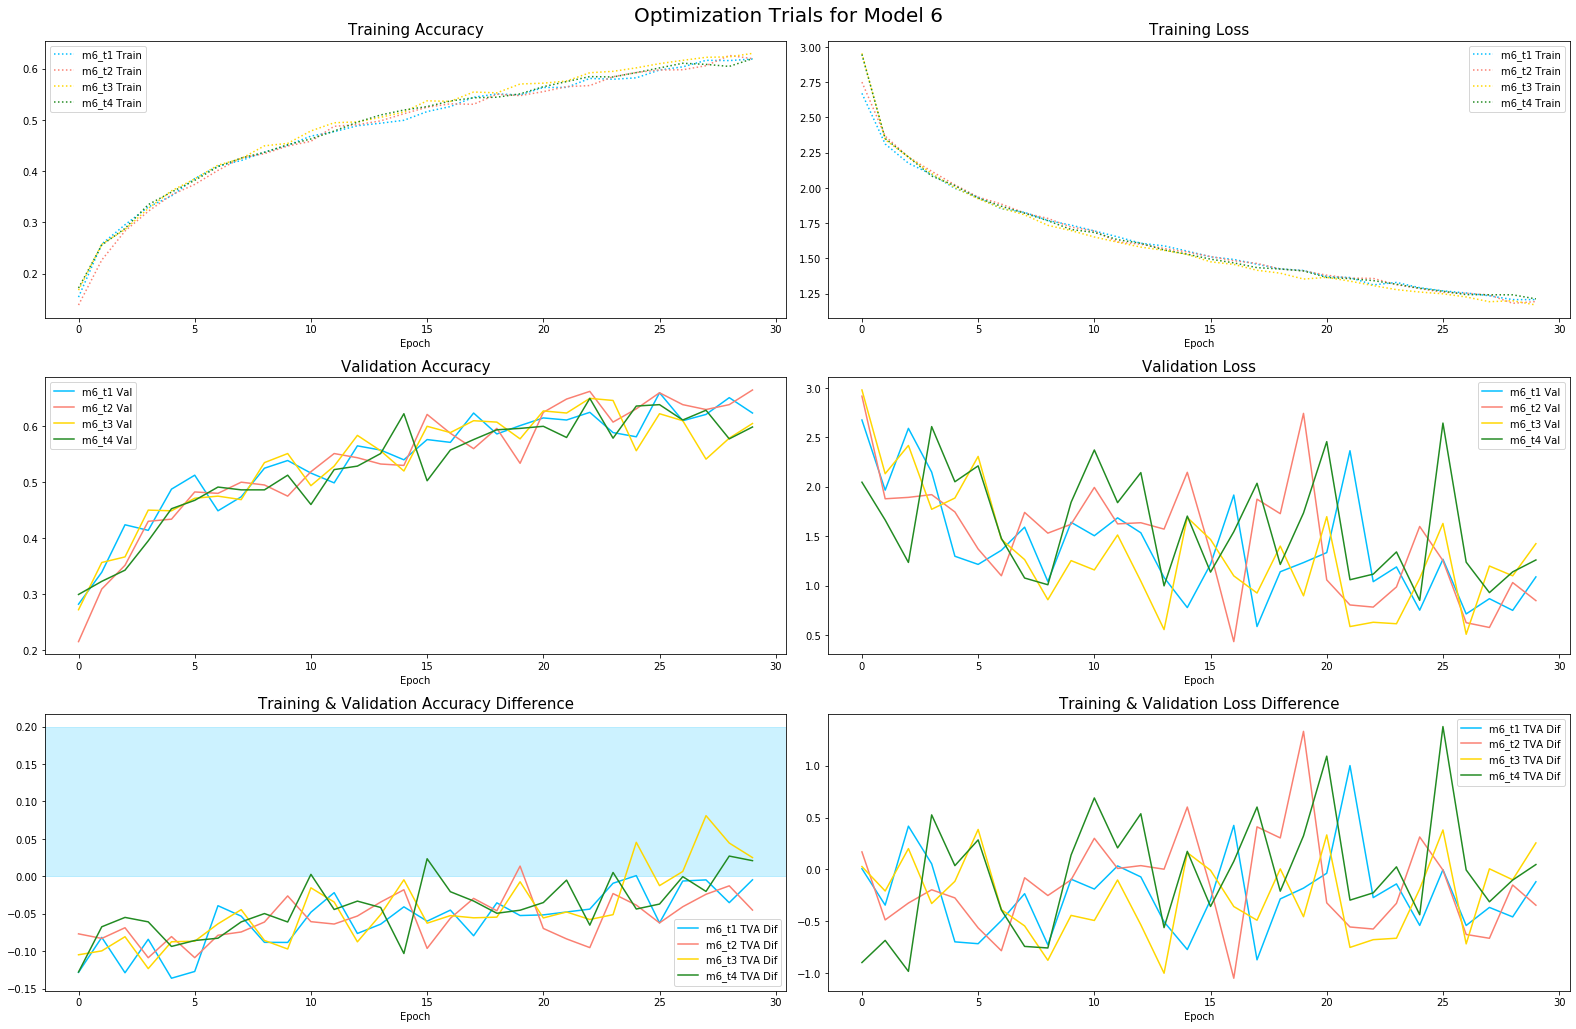

In [22]:
# visualizing evaluation
plot_opt_review(mh6,
                trial_no=6,
                roll=None,
                val_acc_ylim=None,
                val_loss_ylim=None)

### Review Notes:

Somewhat surprisingly, the Glorot initializer trials (t1 and t2) outperform both the He initializer trials (t3 and t4). Generally, ReLU is used with He initialization, but it appears that the Leaky ReLU variant does not require it. In any case, all of the trials continue to underfit, and training accuracy does not yet plateau. Subsequent trials will seek to remedy this. The best trial overall is m6_t2 (Glorot Uniform, ie model_05).

In [23]:
# saving best model in folder and removing others
save_best(m6_names,m6_t2_history,best_name='m6_t2',save_as='model_06')

Cannot save m6_t2 because the file does not exist - maybe already saved as model_06
Cannot remove m6_t1 because the file does not exist - maybe already removed
Cannot remove m6_t2 because the file does not exist - maybe already removed
Cannot remove m6_t3 because the file does not exist - maybe already removed
Cannot remove m6_t4 because the file does not exist - maybe already removed


## Optimization Trial for Model 7: Batch Size Part 2

In [24]:
# loading model histories
with open('../notebooks/model_construction/saved_models/m7_t1_history', 'rb') as file:
    m7_t1_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m7_t2_history', 'rb') as file:
    m7_t2_history=pickle.load(file)

In [25]:
# organizing model details in preparation for evaluation
m7_list = [m7_t1_history, m7_t2_history]
m7_names = ['m7_t1', 'm7_t2']
mh7 = list(zip(m7_names,m7_list))

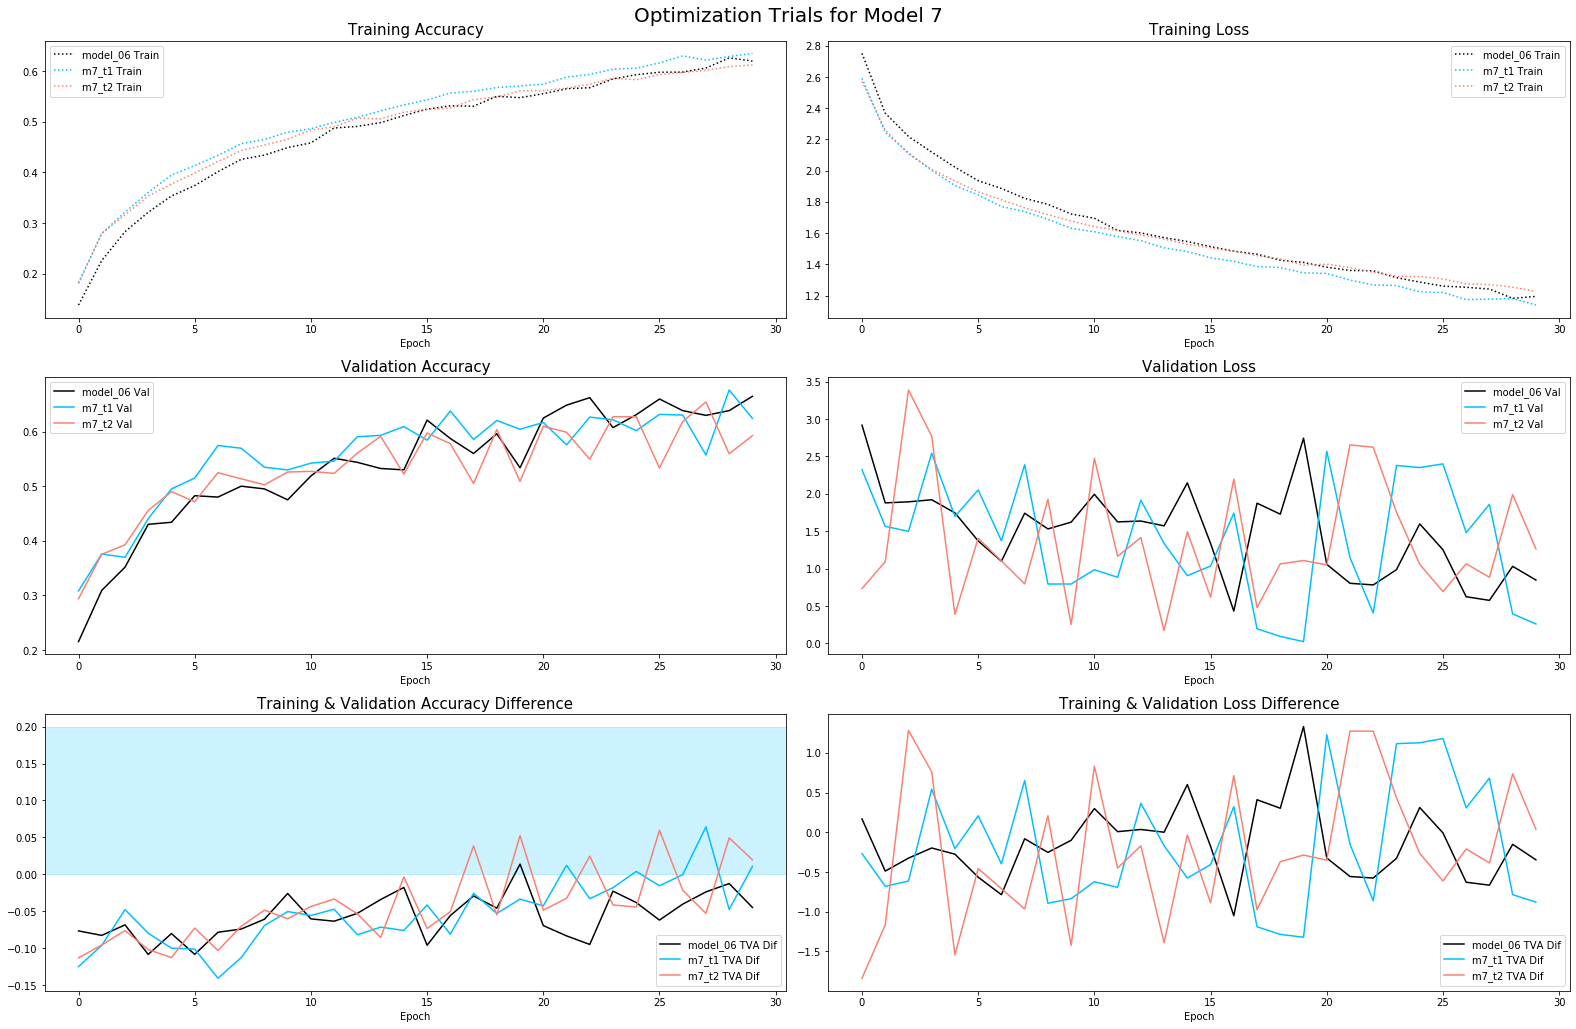

In [26]:
# visualizing evaluation
plot_opt_review(mh7,
                prev_best='model_06',
                trial_no=7,
                roll=None,
                val_acc_ylim=None,
                val_loss_ylim=None)

### Review Notes:

It appears that 8 was the optimal batch size for the model. The validation accuracy and validation loss are both optimized with a batch size of 8.

In [27]:
# saving best model in folder and removing others
save_best(m7_names,m7_t1_history,best_name='m7_t1',save_as='model_07')

Cannot save m7_t1 because the file does not exist - maybe already saved as model_07
Cannot remove m7_t1 because the file does not exist - maybe already removed
Cannot remove m7_t2 because the file does not exist - maybe already removed


## Optimization Trial for Model 8: Additional Capacity

In [28]:
# loading model histories
with open('../notebooks/model_construction/saved_models/m8_t1_history', 'rb') as file:
    m8_t1_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m8_t2_history', 'rb') as file:
    m8_t2_history=pickle.load(file)

In [29]:
# organizing model details in preparation for evaluation
m8_list = [m8_t1_history, m8_t2_history]
m8_names = ['m8_t1', 'm8_t2']
mh8 = list(zip(m8_names,m8_list))

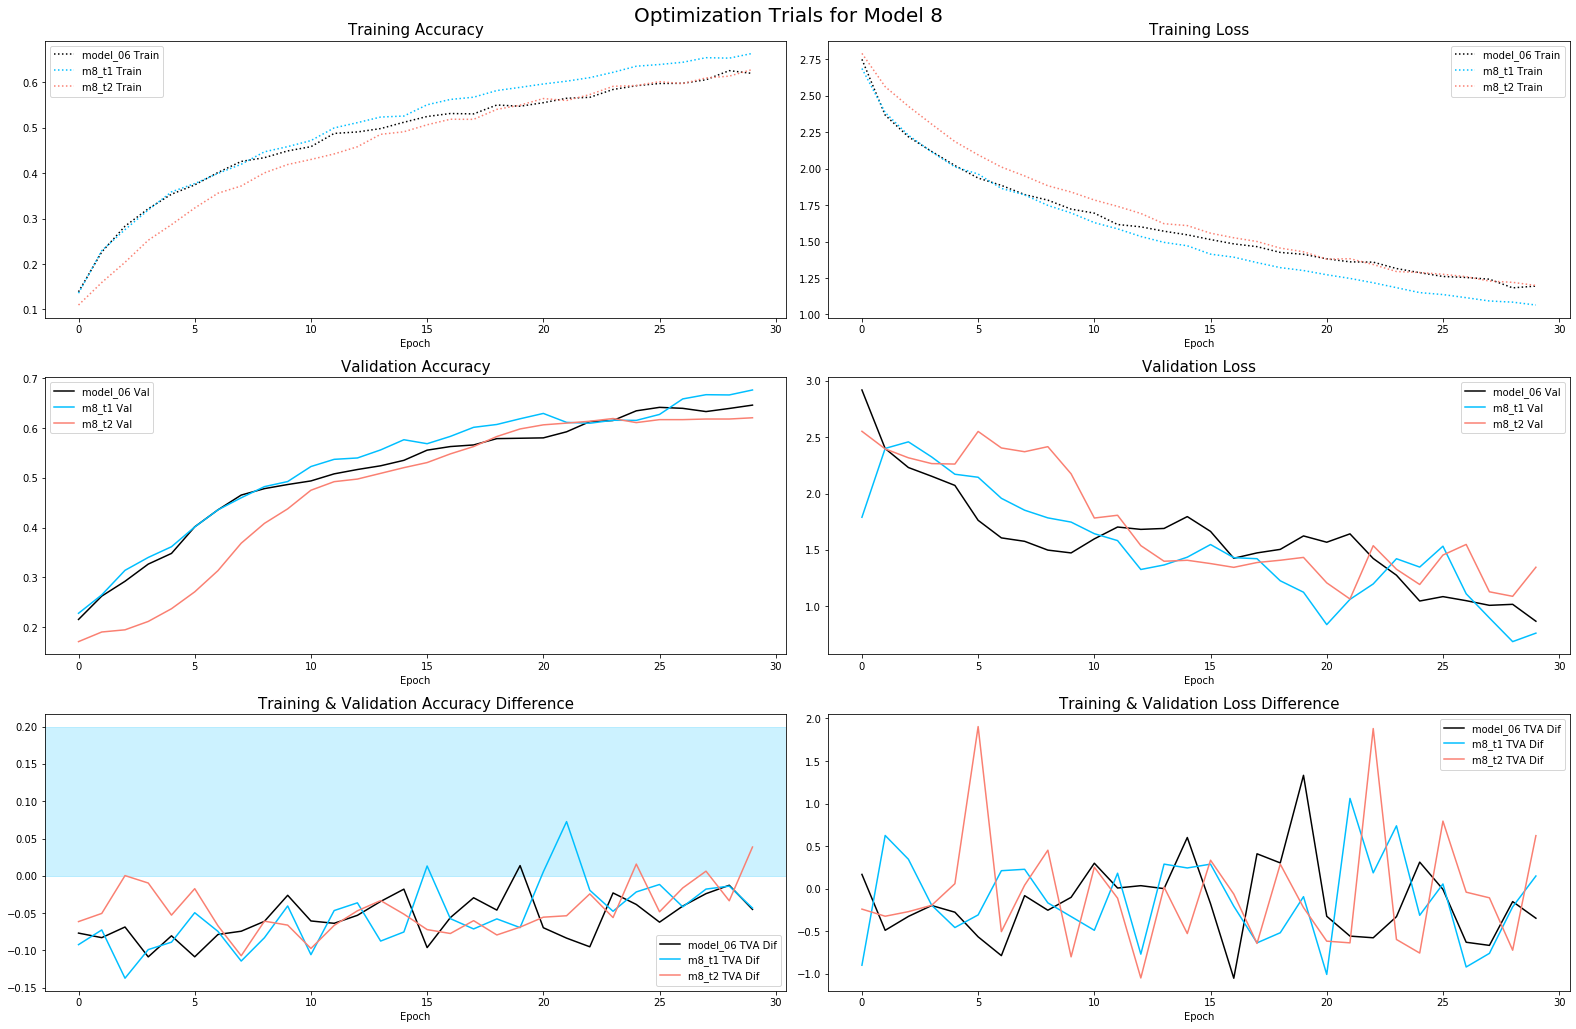

In [30]:
# visualizing evaluation
plot_opt_review(mh8,
                prev_best='model_06',
                trial_no=8,
                roll=5,
                val_acc_ylim=None,
                val_loss_ylim=None)

### Review Notes:

It is clear that the capacity added by the 512-deep convolution layer improves the model performance in terms of both accuracy and loss, suggesting that the model was not sufficiently complex to capture the patters in the data. That said, the model still underfits. Replacing the final max-pooling with convolutions of stride 2 does not improve performance.

In [31]:
# saving best model in folder and removing others
save_best(m8_names,m8_t1_history,best_name='m8_t1',save_as='model_08')

Cannot save m8_t1 because the file does not exist - maybe already saved as model_08
Cannot remove m8_t1 because the file does not exist - maybe already removed
Cannot remove m8_t2 because the file does not exist - maybe already removed


## Optimization Trial for Model 9: Learning Rate Sweep

In [32]:
# loading model histories
with open('../notebooks/model_construction/saved_models/m9_t1_history', 'rb') as file:
    m9_t1_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m9_t2_history', 'rb') as file:
    m9_t2_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m9_t3_history', 'rb') as file:
    m9_t3_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m9_t4_history', 'rb') as file:
    m9_t4_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m9_t5_history', 'rb') as file:
    m9_t5_history=pickle.load(file)

In [33]:
# organizing model details in preparation for evaluation
m9_list = [m9_t1_history, m9_t2_history, m9_t3_history, m9_t4_history, m9_t5_history]
m9_names = ['m9_t1', 'm9_t2', 'm9_t3', 'm9_t4', 'm9_t5']
mh9 = list(zip(m9_names,m9_list))

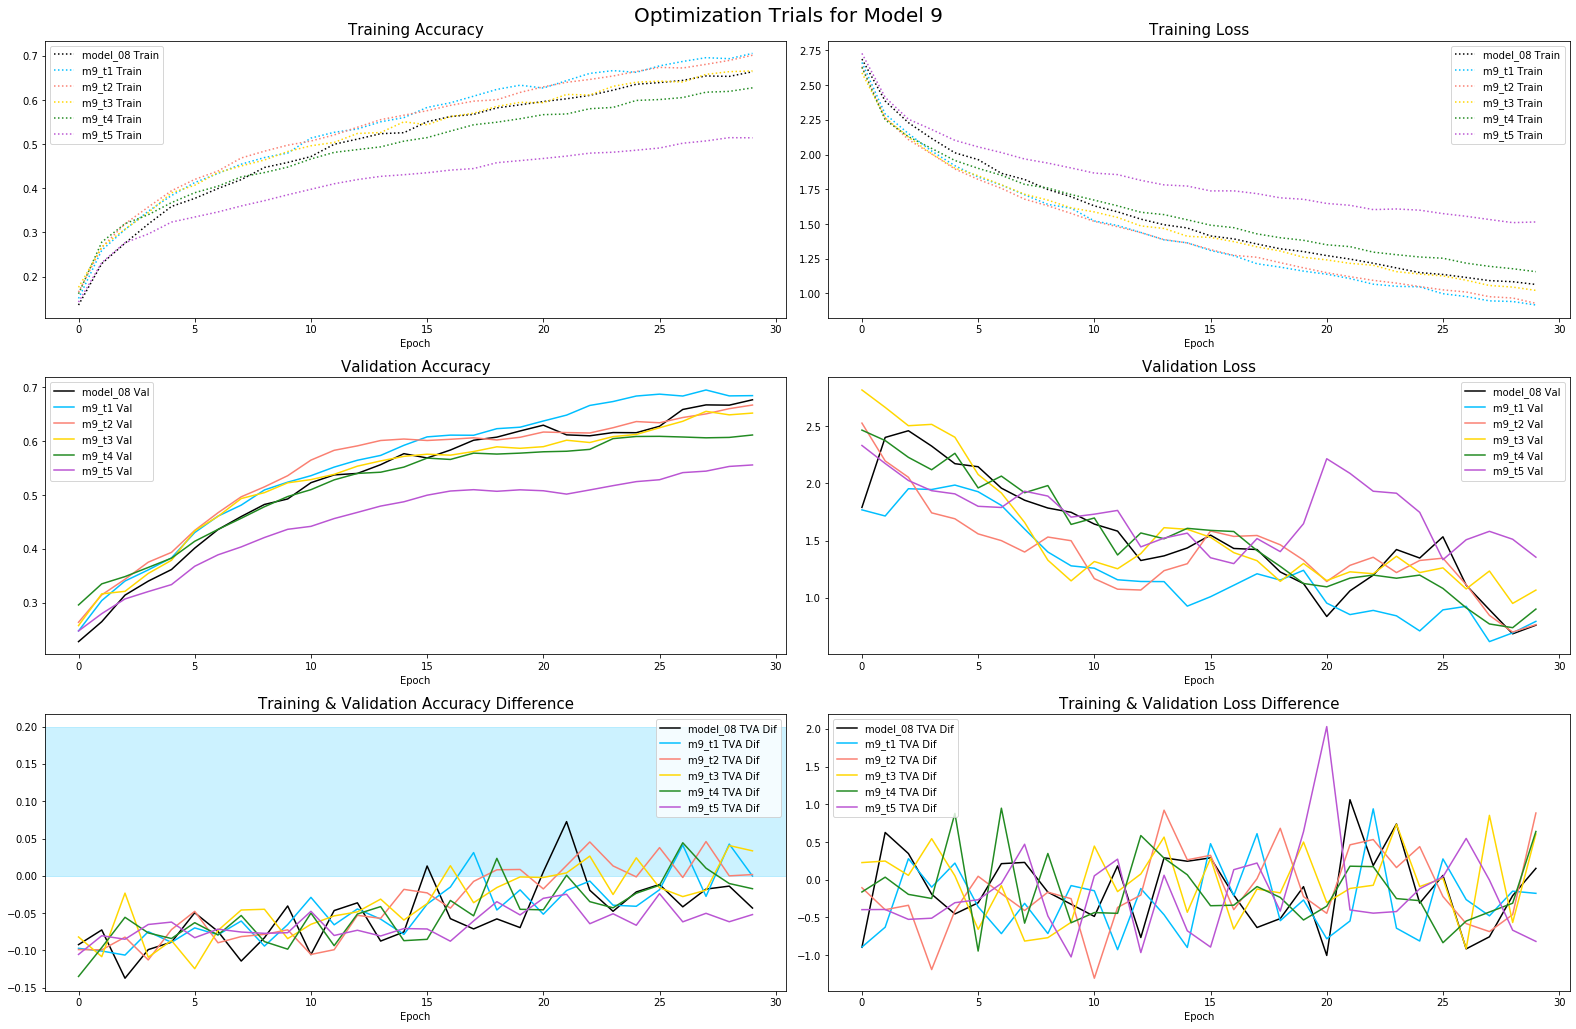

In [34]:
# visualizing evaluation
plot_opt_review(mh9,
                prev_best='model_08',
                trial_no=9,
                roll=5,
                val_acc_ylim=None,
                val_loss_ylim=None)

### Review Notes:

The learning rate appears to affect the training and validation performance proportionately, which each step of decreasing learning rate resulting in a lower training and validation accuracy. However the learning rate of 9E-4 results in the best loss score.

In [35]:
# saving best model in folder and removing others
save_best(m9_names,m9_t1_history,best_name='m9_t1',save_as='model_09')

Cannot save m9_t1 because the file does not exist - maybe already saved as model_09
Cannot remove m9_t1 because the file does not exist - maybe already removed
Cannot remove m9_t2 because the file does not exist - maybe already removed
Cannot remove m9_t3 because the file does not exist - maybe already removed
Cannot remove m9_t4 because the file does not exist - maybe already removed
Cannot remove m9_t5 because the file does not exist - maybe already removed


## Optimization Trial for Model 10: Batch Normalization

In [36]:
# loading model histories
with open('../notebooks/model_construction/saved_models/m10_t1_history', 'rb') as file:
    m10_t1_history=pickle.load(file)
with open('../notebooks/model_construction/saved_models/m10_t2_history', 'rb') as file:
    m10_t2_history=pickle.load(file)

In [37]:
# organizing model details in preparation for evaluation
m10_list = [m10_t1_history, m10_t2_history]
m10_names = ['m10_t1', 'm10_t2']
mh10 = list(zip(m10_names,m10_list))

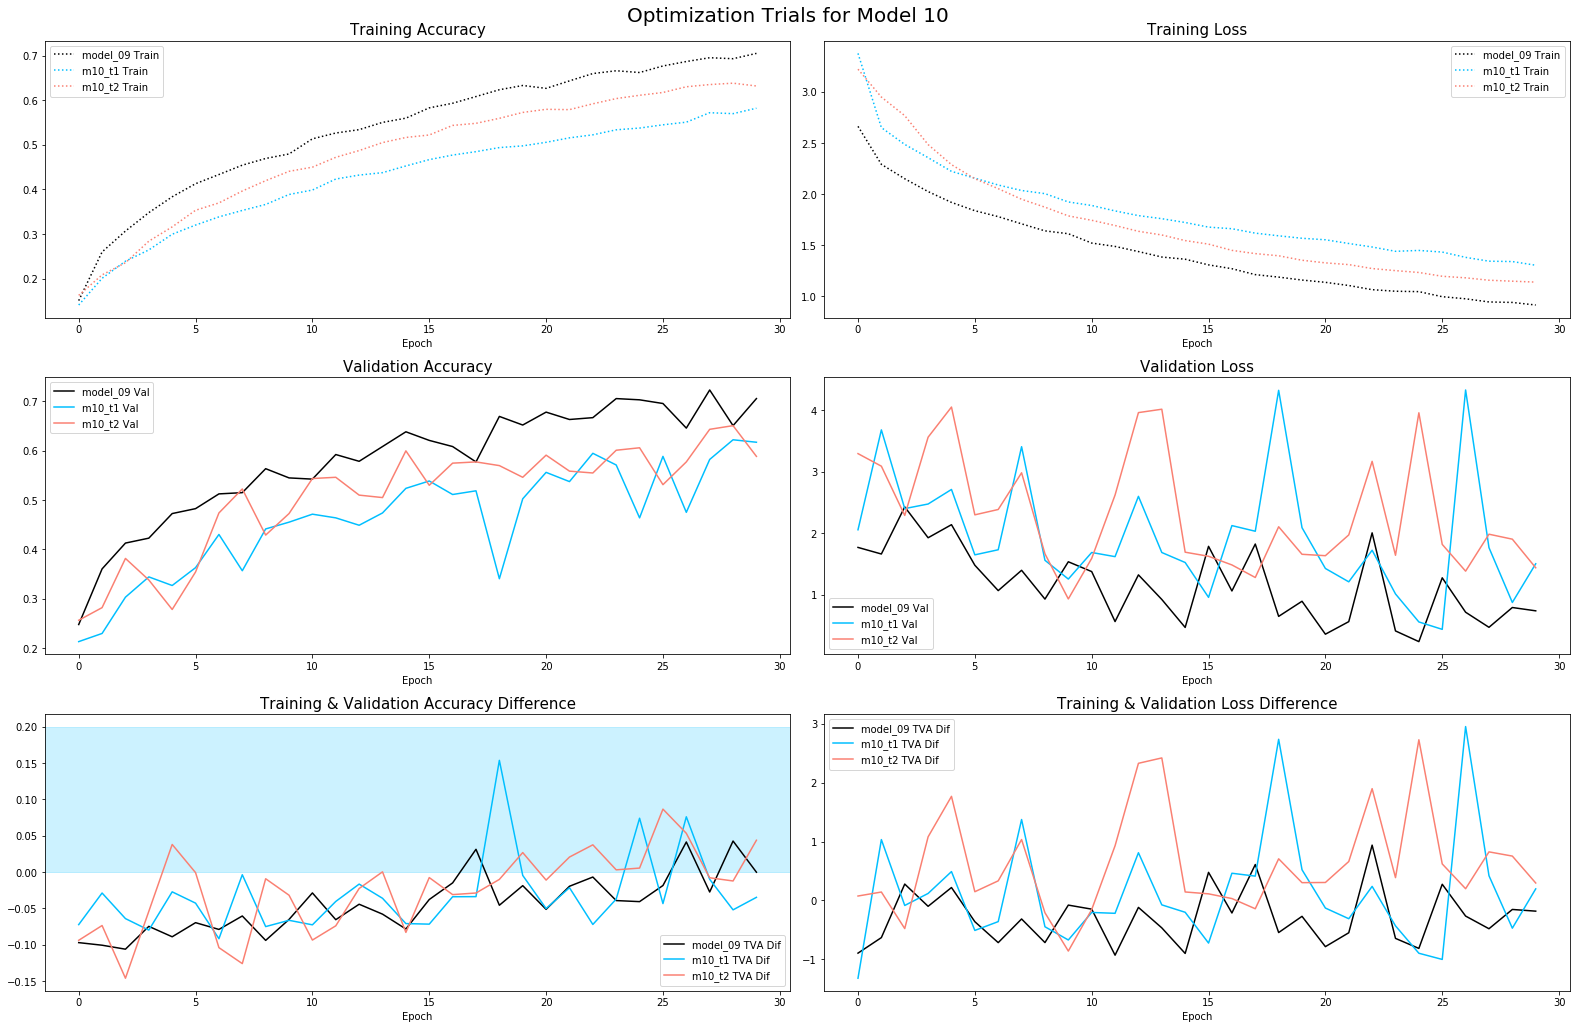

In [38]:
# visualizing evaluation
plot_opt_review(mh10,
                prev_best='model_09',
                trial_no=10,
                roll=None,
                val_acc_ylim=None,
                val_loss_ylim=None)

### Review Notes:

There does not seem to be any benefit in batch normalization in this case. The validation accuracy is reduced and the loss is increased and destabilized. Incidentally, it appears that the model performs better when batch normalization is added after the activation function.

In [39]:
# saving best model in folder and removing others
save_best(m10_names,m10_t2_history,best_name='m10_t2',save_as='model_10')

Cannot save m10_t2 because the file does not exist - maybe already saved as model_10
Cannot remove m10_t1 because the file does not exist - maybe already removed
Cannot remove m10_t2 because the file does not exist - maybe already removed


## Optimization Trial for Model 11: Longer Training Run

In [40]:
# loading model histories
with open('../notebooks/model_construction/saved_models/m11_t1_history', 'rb') as file:
    m11_t1_history=pickle.load(file)

In [41]:
# organizing model details in preparation for evaluation
m11_list = [m11_t1_history]
m11_names = ['m11_t1']
mh11 = list(zip(m11_names,m11_list))

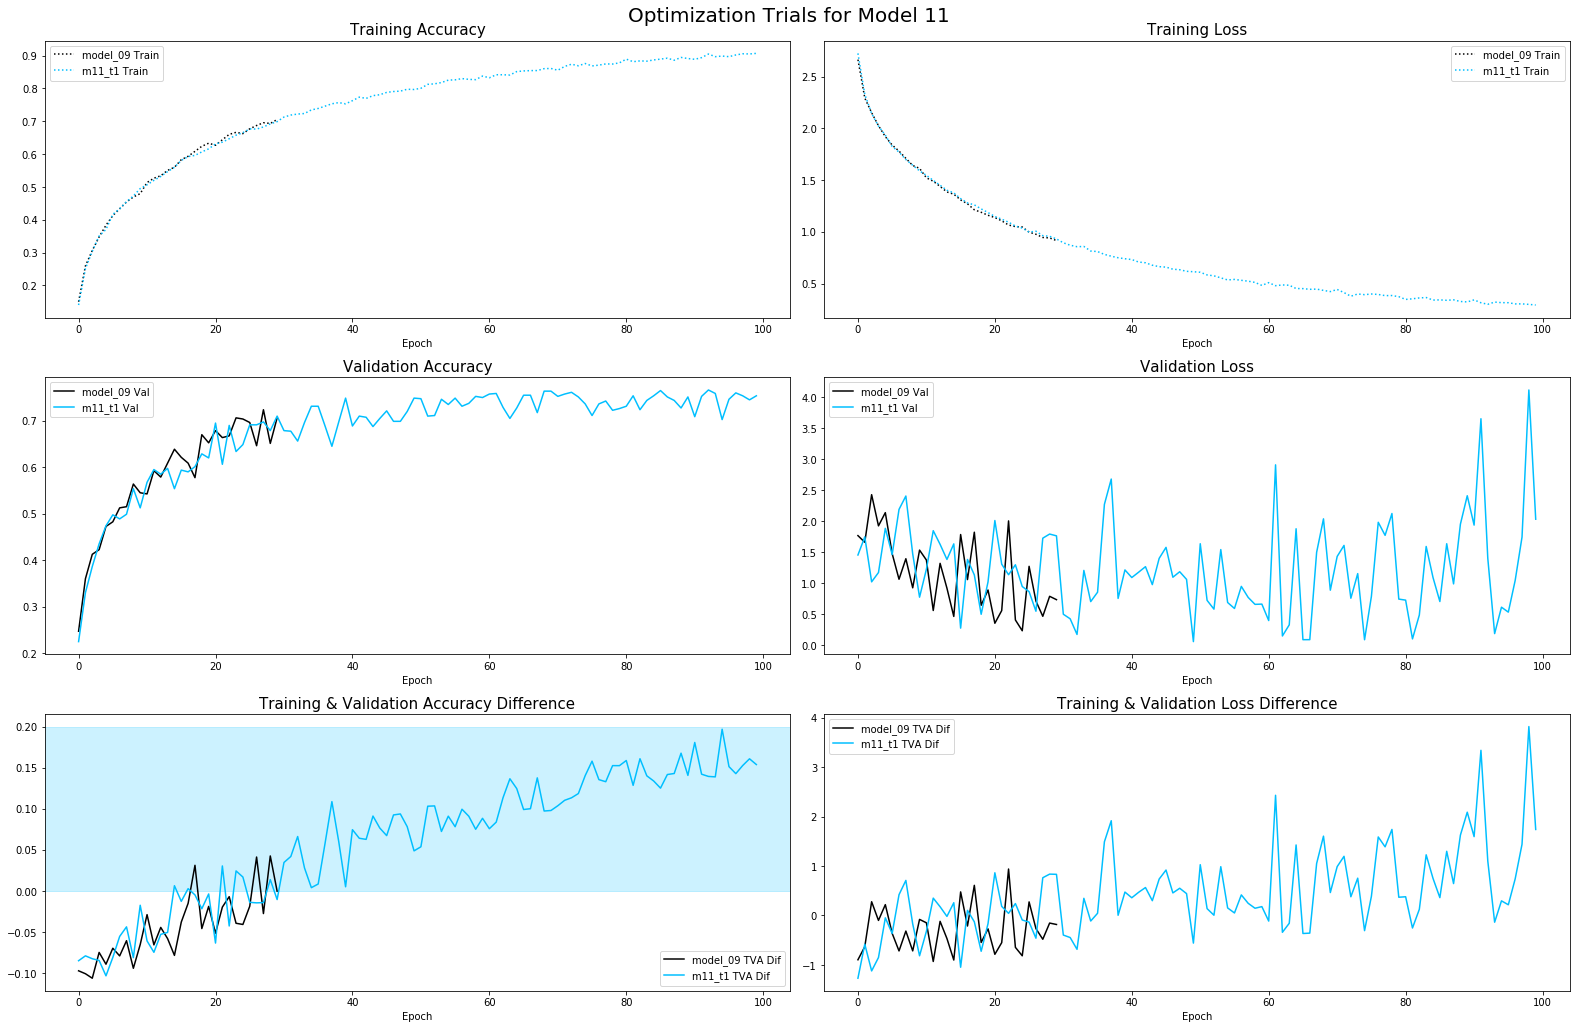

In [42]:
# visualizing evaluation
plot_opt_review(mh11,
                prev_best='model_09',
                trial_no=11,
                roll=None,
                val_acc_ylim=None,
                val_loss_ylim=None)

### Review Notes:

The longer training run shows that the model begins to overfit after approximately epochs. At this point, the validation accuracy stagnates and the validation loss begins to increase. The training accuracy does not yet reach its peak, however, suggesting that there is still some validation accuracy headroom. Overall, the model seems to be approaching the target of 80% validation accuracy.

In [43]:
# saving best model in folder and removing others
save_best(m11_names,m11_t1_history,best_name='m11_t1',save_as='model_11')

Cannot save m11_t1 because the file does not exist - maybe already saved as model_11
Cannot remove m11_t1 because the file does not exist - maybe already removed


## Optimization Trial for Model 12: Aditional Capacity

In [44]:
# loading model histories
with open('../notebooks/model_construction/saved_models/m12_t1_history', 'rb') as file:
    m12_t1_history=pickle.load(file)

In [45]:
# organizing model details in preparation for evaluation
m12_list = [m12_t1_history]
m12_names = ['m12_t1']
mh12 = list(zip(m12_names,m12_list))

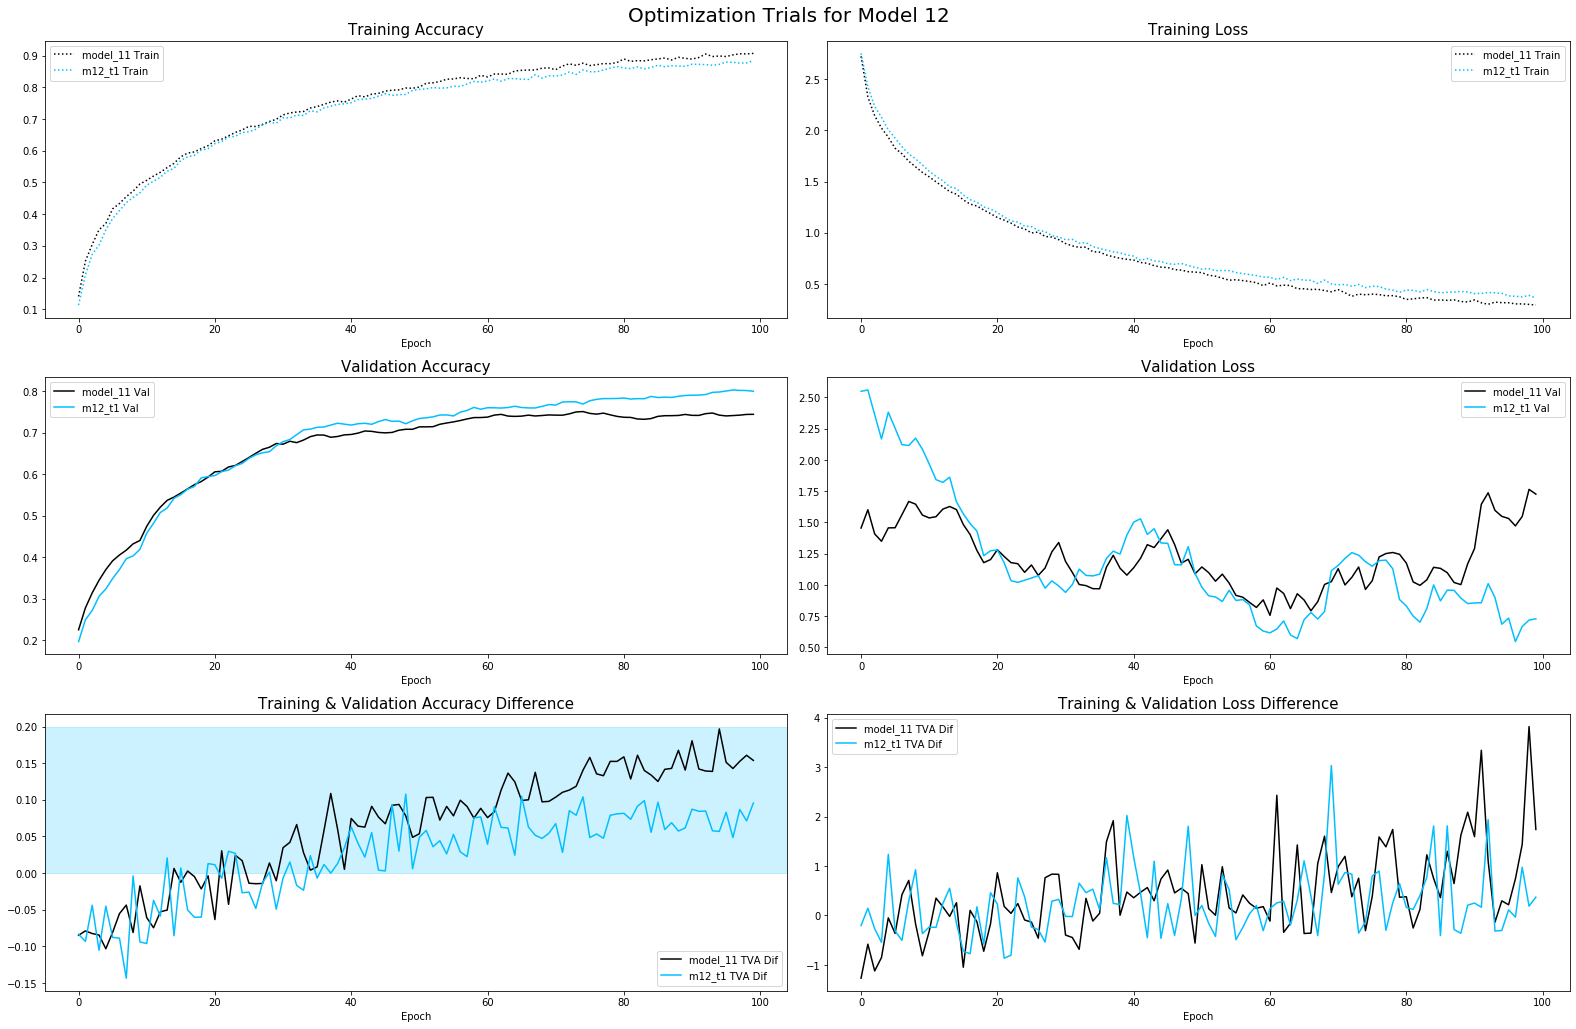

In [46]:
# visualizing evaluation
plot_opt_review(mh12,
                prev_best='model_11',
                trial_no=12,
                roll=10,
                val_acc_ylim=None,
                val_loss_ylim=None)

### Review Notes:

The additional capacity in the model has a notable effect on performance. Interestingly, while the validation performance (in terms of both accuracy and loss) has improved, the training performance has worsened slightly. In any case, the target of 80% validation accuracy has been reached. 

In [47]:
# saving best model in folder and removing others
save_best(m12_names,m12_t1_history,best_name='m12_t1',save_as='model_12')

Cannot save m12_t1 because the file does not exist - maybe already saved as model_12
Cannot remove m12_t1 because the file does not exist - maybe already removed


## Optimization Trial for Model 13: Further Capacity Increase

In [48]:
# loading model histories
with open('../notebooks/model_construction/saved_models/m13_t1_history', 'rb') as file:
    m13_t1_history=pickle.load(file)

In [49]:
# organizing model details in preparation for evaluation
m13_list = [m13_t1_history]
m13_names = ['m13_t1']
mh13 = list(zip(m13_names,m13_list))

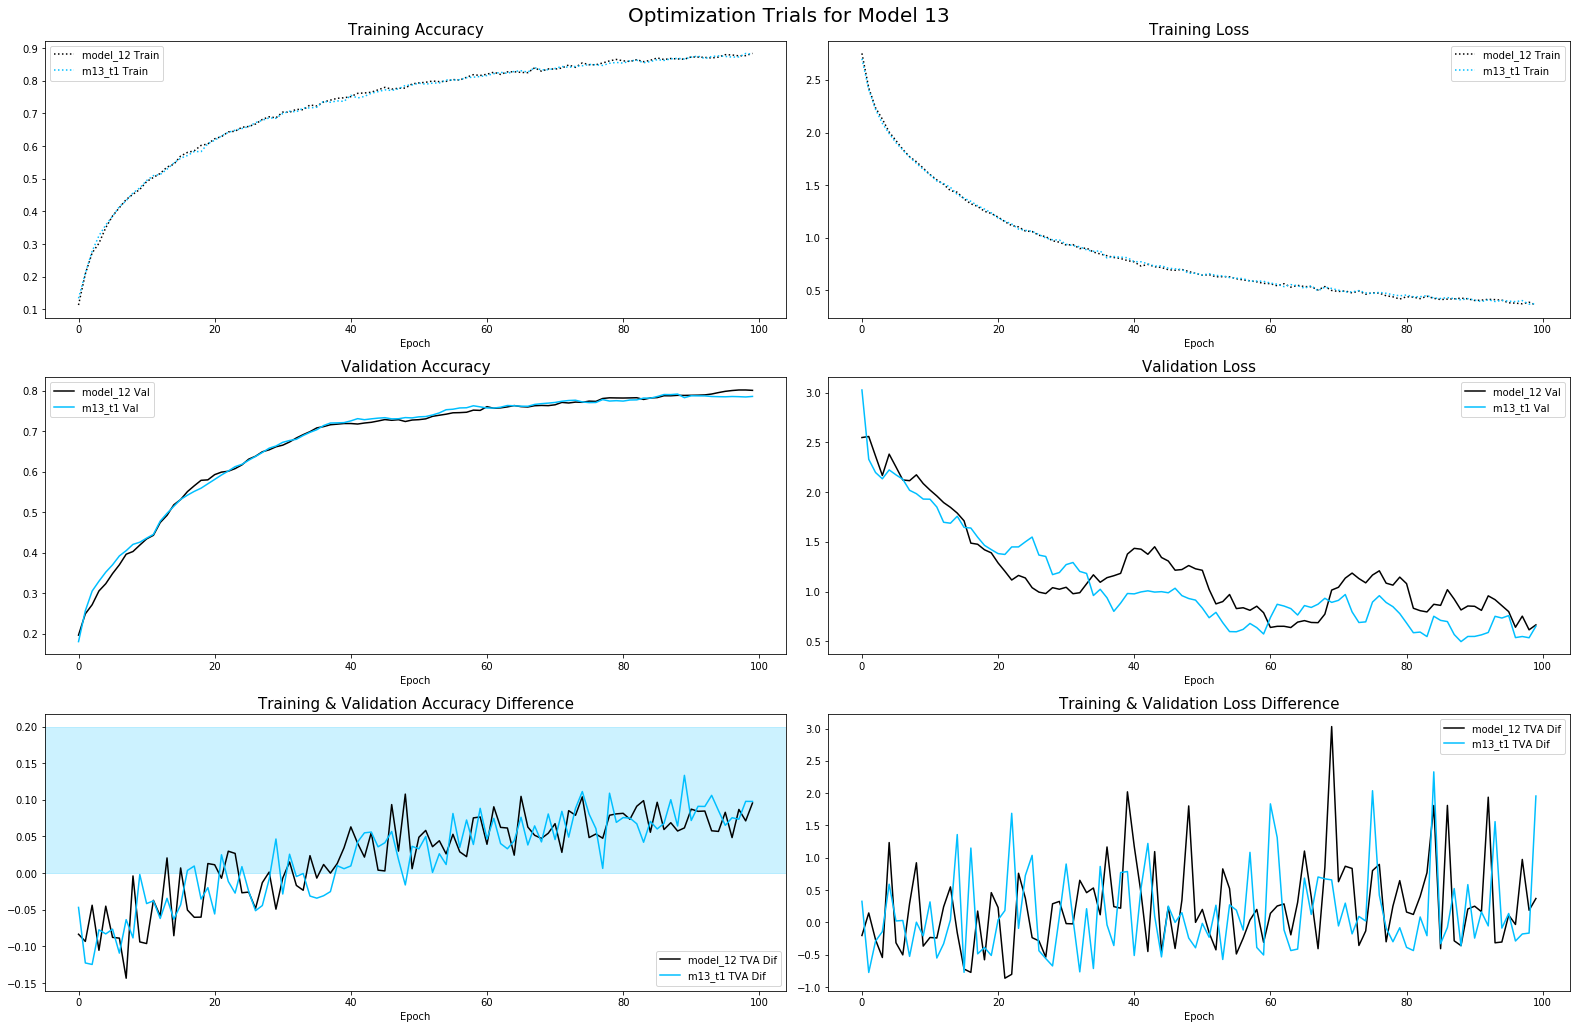

In [50]:
# visualizing evaluation
plot_opt_review(mh13,
                prev_best='model_12',
                trial_no=13,
                roll=12,
                val_acc_ylim=None,
                val_loss_ylim=None)

### Review Notes:

The change in the second dense layer from 1024 neurons to 2048 neurons does not have a significant effect on the validation accuracy. However, it does result in a more stable loss curve, and a greater validation accuracy score overall.

In [51]:
# saving best model in folder and removing others
save_best(m13_names,m13_t1_history,best_name='m13_t1',save_as='model_13')

Cannot save m13_t1 because the file does not exist - maybe already saved as model_13
Cannot remove m13_t1 because the file does not exist - maybe already removed
